# **Obtención de insights a partir de visualizaciones**

**Objetivos generales**
- Obtener datos de diversas fuentes como APIs o Bases de datos públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar una pregunta de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos

**Objetivos específicos**
- Estructurar un problema en función de múltiples pero simples preguntas/hipótesis a responder
- Importar datos crudos de APIs o bases de datos usando Python
- Limpiar y transformar los datos para permitir un posterior análisis
Contar una historia mediante el análisis exploratorio de datos

**Requisitos base**

Un notebook (Colab o Jupyter) que debe contener:
1. Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia  se podrá beneficiar de este análisis
2. Preguntas/hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos. Bloques de código donde se importan los datos desde una API o base de datos pública y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de código
3. Análisis exploratorio de datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas.

# **Bike Sharing (Préstamo de bicicletas)**

**Abstract:**

El sistema Bike Sharing es una nueva generacion del tradicional "Alquiler de bicicletas", donde todo el proceso, desde la subscripcion, el alquiler y la devolucion se transformó en automatico. A través de este sistema, el usuario puede facilmente alquilar una bicicleta desde un lugar en particular y regresarla en otro lugar especifico. Actualmente hay alrededor de 500 programas Bike-Sharing alrededor del mundo que estan compuesto por cerca de 500000 bicicletas. Hoy en dia, existe un gran interés en estos sistemas debido al importante rol que tienen las bicicletas en el trafico, ya que contribuyen al medio ambiente y ayudan a mejorar la salud en cierta forma.

Aparte del interes real en el mundo de las aplicaciones de sistemas Bike Sharing, las caracteristicas de la informacion generada por estos sistemas, la hacen atractiva para la investigacion.

Opuesto a lo que sucede con otros servicios de transporte como colectivos o subtes, la duracion del recorrido, el punto de inicio y fin, o las condiciones climaticas podrian grabarse en estos sistemas. Esta caracteristica convierte al sistema Bike-Sharing  en una red de sensores virtuales que puede ser usada para censar la movilidad producida en la ciudad y detectar los eventos de mayor importancia en la ciudad, aunque no es el caso de este dataset, ya que no contamos con los datos de inicio y final de cada recorrido.

**Indice:**

1- Dataset utilizado

2- Objetivo del trabajo final

3- Contexto Comercial

4- Problema Comercial

5- Contexto analitico

6- Exploratory Data Analysis (EDA)

* 6.1- Cantidad de usuarios según distintos parámetros

* 6.2- Comportamiento del clima según distintos parametros

* 6.3- Tipos de usuarios según distintos parámetros

* 6.4- Recomendaciones con base en insights observados

* 6.5- Graficos según las variables destacadas observadas

* 6.6- Conclusiones del Exploratory Data Analysis (EDA)

7- Aplicacion de un algoritmo de regresión para entrenar con los datos elegidos

* 7.1- Metodo OLS

* 7.2- Metodo LinearRegression de sklearn.linear_model

* 7.3- Métricas para validar el modelo

* 7.4- Conclusiones

8- Pronostico del tiempo para predecir valores

* 8.1- Limpieza de datos

- * 8.1.1- Agregamos una columna que se relacione con weathersit en el primer Dataset

- * 8.1.2- Modificacion de la columna dt

* 8.2- Visualizaciones

* 8.3- Conclusiones

**1. Dataset utilizado:**

En este dataset vamos a encontrar un detalle donde cada registro contiene informacion sobre cada hora del dia: como estaba el clima, cual era la humedad, la temperatura, el viento, la cantidad de usuarios (registrados o casuales), si trató de un feriado o no, si era dia de semana o no, etc.

In [ ]:
#Tenemos aproximadamente 17000 registros, y 17 columnas
#Para cargar los valores escribir "y" cuando se pregunte si debe reemplazar los archivos

#Carga del Dataset Bike Sharing:

!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip
import pandas as pd
df = pd.read_csv("hour.csv", header=0, delimiter=",")
df.head()

--2022-10-04 01:14:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   444KB/s    in 0.6s    

2022-10-04 01:14:34 (444 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




**2. Objetivo del trabajo final:**

En la presente entrega se busca analizar los datos obtenidos sobre el alquiler de bicicletas en una determinada ciudad para luego generar modelos de predicción que nos permitan estimar la cantidad de bicicletas en uso. Con este modelo, y apoyandonos en el pronostico del tiempo podremos estimar esta variable a futuro. 

**3. Contexto Comercial:**

Un nuevo sistema de alquiler de bicicletas se ha implementado en la ciudad. Luego de dos años recolectando información relativa a la cantidad de usuarios, en conjunto con las condiciones climáticas, la empresa quiere saber que factores influyen en el aumento o disminucion de usuarios.

Se necesitarán distintas visualizaciones para encontrar diversos patrones. Esto ayudará a la compañia a determinar distintos momentos del dia o del año para realizar tareas de mantenimiento y campañas de marketing.

**4. Problema Comercial:**

La tarea a realizar es analizar los datos obtenidos, y realizar las distintas visualizaciones que permitan responder las siguientes preguntas:
* ¿Existe alguna condicion climatica que favorezca el Sharing?
* ¿Cual es la hora del dia que menos bicleticas se alquilan? Esto podria ayudarnos a programar los distintos mantenimientos (bicicletas, lugares de recogida, apps).
* ¿Existen factores condicionantes como el viento, la humedad o la temperatura?

**5. Contexto analitico:**

Se ha proporcinado una base de datos en un archivo .zip (almacenado en la web) que contiene detalles sobre la cantidad de usuarios usando una bicicleta durante cada hora del dia. Cada linea contiene datos sobre la el dia, la hora, condiciones climaticas (temperatura, sensacion termica, humedad, velocidad del viento), cantidad de usuarios registrados, casuales y totales.

Realizará las siguientes tareas con los datos:
- Extraer los datos del archivo .zip
- Preparar los datos para las visualizaciones
- Analizar las visualizaciones y extraer patrones.
Extraiga datos adicionales del municipio almacenados en un archivo JSON
Leer, transformar y preparar datos para su visualización
Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

Estas visualizaciones deberán poder responder las preguntas / hipotesis mencionadas anteriormente.



**6. Exploratory Data Analysis (EDA):**

En esta etapa procederemos a realizar un analisis exploratorio de los datos obtenidos.

Para poder entender el comportamiento de los usuarios necesitamos realizar distintas visualizaciones, las cuales se muestran a continuación:

**6.1 Cantidad de usuarios según distintos parámetros:**

En primera medida nos interesa saber como es la distribucion de usuarios usando una bicicleta segun distintos parametros:

- Mes del año
- Hora del dia
- Condición climática (weathersit)
- Etc.

Text(0, 0.5, 'Cantidad de usuarios')

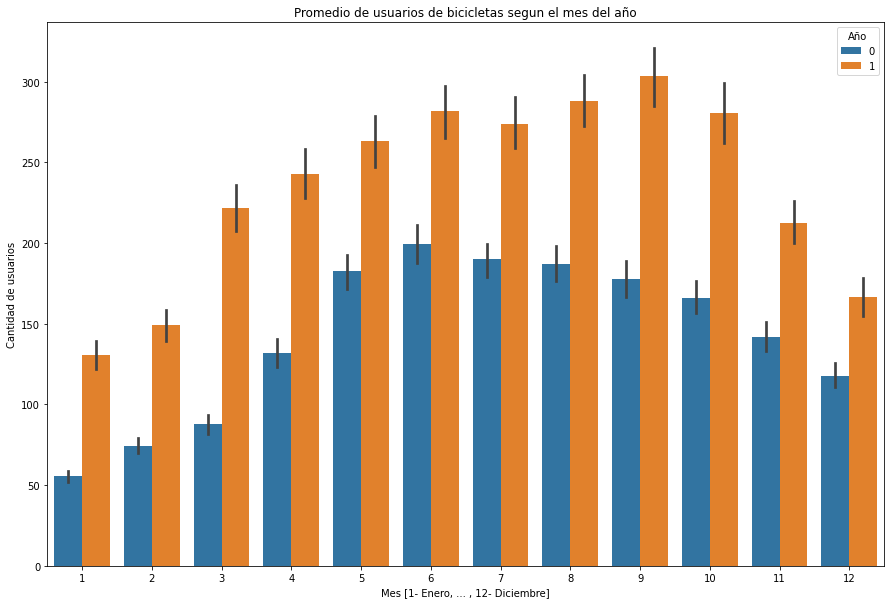

In [ ]:
# Cantidad de usuarios promedio por dia según el mes

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

CU = pd.DataFrame()
CU['Mes'] = df.mnth
CU['Año'] = df.yr
CU['Usuarios'] = df.cnt
CU['Dia de la semana']=df.weekday
CU['Dia laboral']=df.workingday

fig, ax1 = plt.subplots(figsize=(15,10))
ax1= sns.barplot(data=CU, x="Mes", y="Usuarios", hue='Año')
# Recordar que el año "0" corresponde a 2011 y el año "1" a 2012

ax1.set_title('Promedio de usuarios de bicicletas segun el mes del año')
ax1.set_xlabel('Mes [1- Enero, ... , 12- Diciembre]')
ax1.set_ylabel('Cantidad de usuarios')

# En primer lugar observamos que hay una mayor demanda en el año 2012 (1) sobre el 2011 (0).
# Tambien observamos una demanda pico en los meses junio, julio, agosto y septiembre

Text(0, 0.5, 'Cantidad de usuarios')

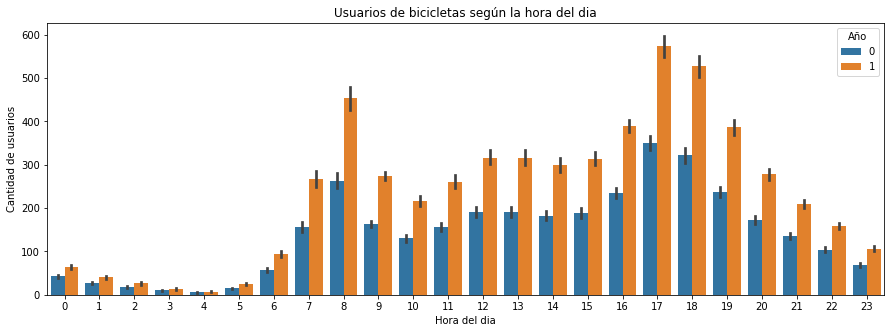

In [ ]:
# Cantidad de usuarios segun la hora del dia

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

UH = pd.DataFrame()
UH['Hora'] = df.hr
UH['Año'] = df.yr
UH['Usuarios'] = df.cnt

fig, ax2 = plt.subplots(figsize=(15,5))
ax2= sns.barplot(data=UH, x="Hora", y="Usuarios", hue='Año')

ax2.set_title('Usuarios de bicicletas según la hora del dia')
ax2.set_xlabel('Hora del dia')
ax2.set_ylabel('Cantidad de usuarios')

# Podemos ver que en ambos años, el comportamiento es similar. Existe una baja demanda en las primeras 5 hora del dia
# y tenemos picos marcados a las 8:00, a las 17:00 y a las 18:00 hs.

Text(0, 0.5, 'Cantidad de usuarios')

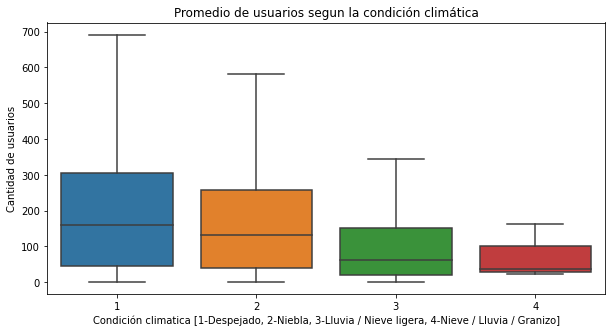

In [ ]:
# Usuarios segun la condición climática

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

UCC = pd.DataFrame()
UCC['Condición_Climatica'] = df.weathersit
UCC['Año'] = df.yr
UCC['Usuarios'] = df.cnt

fig, ax3 = plt.subplots(figsize=(10,5))
ax3=sns.boxplot(x='Condición_Climatica', y = 'Usuarios', data = UCC, showfliers = False)

ax3.set_title('Promedio de usuarios segun la condición climática')
ax3.set_xlabel('Condición climatica [1-Despejado, 2-Niebla, 3-Lluvia / Nieve ligera, 4-Nieve / Lluvia / Granizo]')
ax3.set_ylabel('Cantidad de usuarios')

# Se observa que la condición climatica 1 (Despejado, Pocas nubes, Parcialmente nublado) y 2 (Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla)
# son las mas favorables para el alquiler de bicicletas.
# A su vez se observa una demanda excesivamente baja en la condición 4 (Lluvia intensa + Granizo + Tormenta eléctrica + Niebla, Nieve + niebla).

**6.2 Comportamiento del clima según distintos parametros:**

Por otro lado, necesitamos entender como se comporta el clima en función de:

- Estación del año
- Humedad
- Hora del dia

Text(0, 0.5, 'Temperatura normalizada')

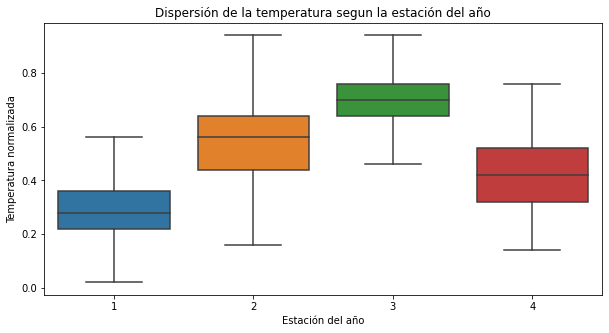

In [ ]:
# Dispersion de la temperatura en funcion de la estación

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

TT = pd.DataFrame()
TT['Estacion'] = df.season
TT['Temperatura'] = df.temp
TT['Año'] = df.yr
TT['Usuarios'] = df.cnt

fig, ax3 = plt.subplots(figsize=(10,5))
ax3=sns.boxplot(x='Estacion', y = 'Temperatura', data = TT, showfliers = False)

ax3.set_title('Dispersión de la temperatura segun la estación del año')
ax3.set_xlabel('Estación del año')
ax3.set_ylabel('Temperatura normalizada')

# Podemos ver que la estacion 3 (Verano), es la que registra las temperaturas mas altas.
# Esto coincide con los relevado en el primer grafico, donde el pico de demanda era mayor en esta epoca.

# Podriamos concluir con la temperatura afecta directamente proporcional a la demanda de bicicletas.

Text(0, 0.5, 'Humedad normalizada')

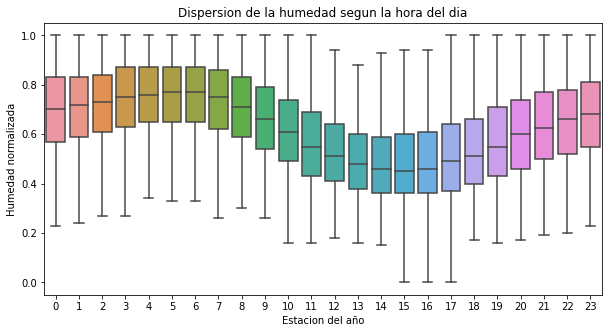

In [ ]:
# Dispersion de la humedad en funcion de la hora del dia

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

TT['Humedad'] = df.hum
TT['Hora'] = df.hr

fig, ax6 = plt.subplots(figsize=(10,5))
ax6=sns.boxplot(x='Hora', y = 'Humedad', data = TT, showfliers = False)


ax6.set_title('Dispersion de la humedad segun la hora del dia')
ax6.set_xlabel('Estacion del año')
ax6.set_ylabel('Humedad normalizada')

# Podemos ver que existe una relacion entre la humedad y la hora del dia.
# Sin embargo esto no nos permite sacar ninguna conclusion, ya que no vemos un comportamiento
# que se asemeje a lo visto anteriormente (Usuarios por hora por ejemplo)

**6.3 Tipos de usuarios según distintos parámetros:**

Otros datos de interes podrian ser la cantidad de usuarios registrados o casuales según:

- Hora del dia
- Condición climática (weathersit)

Text(0, 0.5, 'Cantidad de usuarios [%]')

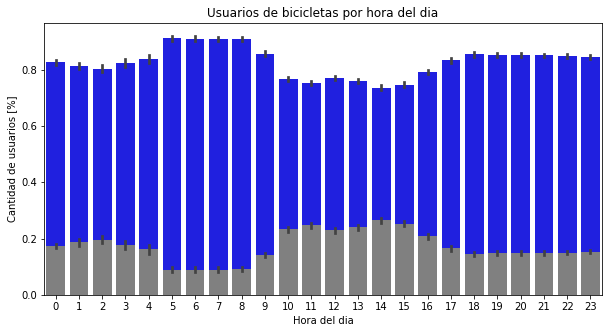

In [ ]:
# Los usuarios ¿son casuales o registrados según la hora del dia?

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

URC = pd.DataFrame()
URC['Hora'] = df.hr
URC['Condición_Climatica'] = df.weathersit
URC['Casuales'] = df.casual
URC['Registrados'] = df.registered
URC['Totales'] = df.cnt
URC['Casuales%'] = URC['Casuales']/URC['Totales']
URC['Registrados%'] = URC['Registrados']/URC['Totales']

fig, ax7 = plt.subplots(figsize=(10,5))
ax7= sns.barplot(data=URC, x="Hora", y="Registrados%", color = 'blue')
ax7= sns.barplot(data=URC, x="Hora", y="Casuales%", color = 'gray')

ax7.set_title('Usuarios de bicicletas por hora del dia')
ax7.set_xlabel('Hora del dia')
ax7.set_ylabel('Cantidad de usuarios [%]')

# Vemos que independientemente de la hora, el usuario casual es cerca del 20% del total.
# Sin embargo, podemos ver que en el horario entre las 5 y las 8 de la mañana este porcentaje disminuye a cerca del 10%.
# Esto nos podria servir para hacer algun tipo de publicidad para generar mayor cantidad de usuarios en esta franja horaria.

Text(0, 0.5, 'Cantidad de usuarios [%]')

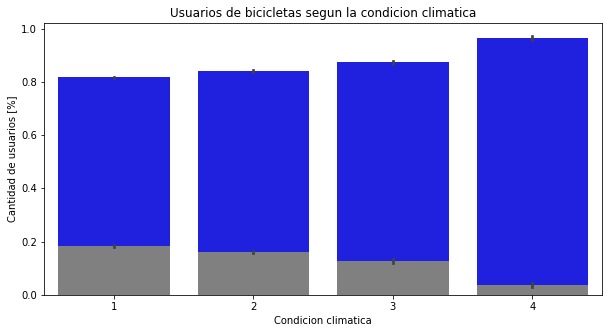

In [ ]:
# Los usuarios ¿son casuales o registrados según condicion climática?

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax8 = plt.subplots(figsize=(10,5))
ax8= sns.barplot(data=URC, x="Condición_Climatica", y="Registrados%", color = 'blue')
ax8= sns.barplot(data=URC, x="Condición_Climatica", y="Casuales%", color = 'gray')

ax8.set_title('Usuarios de bicicletas segun la condicion climatica')
ax8.set_xlabel('Condicion climatica')
ax8.set_ylabel('Cantidad de usuarios [%]')

# Según la condición climatica, la unica conclusión a la que podemos arribar es que en la condición 4 el porcentaje de usuarios
# casi en su totalidad es de usuarios registrados.

**6.4 Recomendaciones con base en insights observados**

Segun los insights observados podemos concluir lo siguiente:

- En primer lugar observamos que hay una mayor demanda en el año 2012 (1) sobre el 2011 (0). Tambien observamos una demanda pico en los meses junio, julio, agosto y septiembre.
- Existe una baja demanda en las primeras 5 hora del dia, y tenemos picos marcados a las 8:00, a las 17:00 y a las 18:00 hs. Este pico coincide con dias de trabajo.
- La estacion 3 (Verano), es la que registra las temperaturas mas altas. Esto coincide con lo relevado en el primer grafico, donde el pico de demanda era mayor en esta epoca. Podriamos concluir con la temperatura afecta directamente proporcional a la demanda de bicicletas.
- Podemos ver que en la condición climatica 4 (Lluvia / granizo / nieve) se produce la menor cantidad de alquiler de biciletas independientemente de la hora o la epoca del año.
- Existe una relacion entre la humedad y la hora del dia. Sin embargo esto no nos permite sacar ninguna conclusion, ya que no vemos un comportamiento que se asemeje a lo visto anteriormente (Usuarios por hora por ejemplo).
- Para el caso del tipo de usuario, vemos que independientemente de la hora, el usuario casual es cerca del 20% del total. Sin embargo, podemos ver que en el horario entre las 5 y las 8 de la mañana este porcentaje disminuye a cerca del 10%. Esto nos podria servir para hacer algun tipo de publicidad para generar mayor cantidad de usuarios en esta franja horaria.

A la hora de responder las preguntas o hipotesis podemos establecer lo siguiente:
- Entre las 5 y las 8 am tenemos un pico de demanda tanto en cantidad de usuarios como de porcentaje de usuarios registrados. Esta franja horaria nos puede permitir realizar una campaña publicitaria de fidelizacion de clientes (descuentos, promociones, etc.).
- En verano debemos disponibilizar la mayor cantidad de bicicletas. A su vez vemos que durante el invierno nos permite realizar los mantenimientos preventivos ya que es la estación donde se produce la menor cantidad de alquiler promedio.
- Existe una relacion directamente proporcional entre la temperatura y la cantidad de usuarios registrados. Esto nos permite:
  - Disponibilizar mayor cantidad de bicicletas al aumentar la temperatura.
  - Realizar mantenimiento cuando la temperatura desciende.
- De acuerdo a lo observado en entregas anteriores factores como la humedad o la velocidad del viento no inciden sobre la cantidad de usuarios registrados.
- Podemos concluir que las variables que mas influyen sobre la cantidad de usuarios registrados son:
  - Hora del dia
  - Temperatura
  - Estación del año
  - Condición climatica

**6.5 Graficos según las  variables destacadas observadas**

Text(0, 0.5, 'Usuarios')

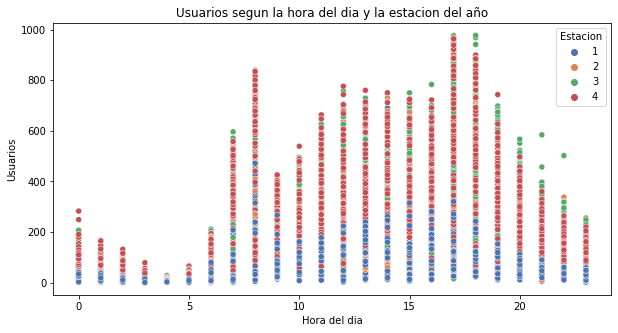

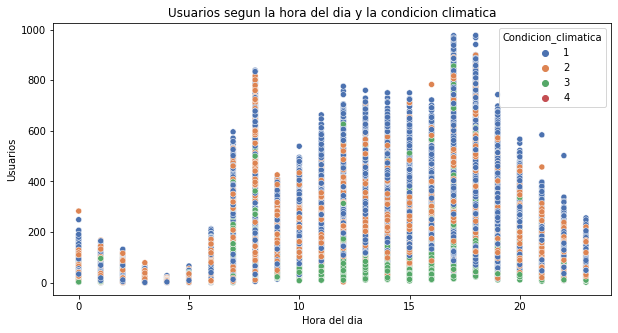

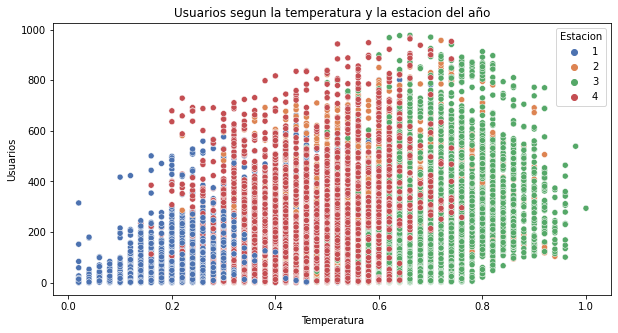

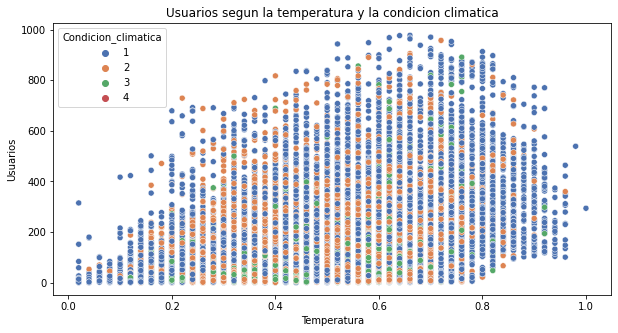

In [ ]:
# Grafico de puntos según las  variables destacadas observadas

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

THE = pd.DataFrame()
THE['Dia'] = df.dteday
THE['Hora'] = df.hr
THE['Temperatura'] = df.temp
THE['Estacion'] = df.season
THE['Condicion_climatica'] = df.weathersit
THE['Usuarios'] = df.cnt


fig, ax1 = plt.subplots(figsize=(10,5))
ax1= sns.scatterplot(data=THE, x="Hora", y="Usuarios", hue='Estacion', palette="deep")

ax1.set_title('Usuarios segun la hora del dia y la estacion del año')
ax1.set_xlabel('Hora del dia')
ax1.set_ylabel('Usuarios')

fig, ax2 = plt.subplots(figsize=(10,5))
ax1= sns.scatterplot(data=THE, x="Hora", y="Usuarios", hue='Condicion_climatica', palette="deep")

ax2.set_title('Usuarios segun la hora del dia y la condicion climatica')
ax2.set_xlabel('Hora del dia')
ax2.set_ylabel('Usuarios')

fig, ax3 = plt.subplots(figsize=(10,5))
ax3= sns.scatterplot(data=THE, x="Temperatura", y="Usuarios", hue='Estacion', palette="deep")

ax3.set_title('Usuarios segun la temperatura y la estacion del año')
ax3.set_xlabel('Temperatura')
ax3.set_ylabel('Usuarios')

fig, ax4 = plt.subplots(figsize=(10,5))
ax4= sns.scatterplot(data=THE, x="Temperatura", y="Usuarios", hue='Condicion_climatica', palette="deep")

ax4.set_title('Usuarios segun la temperatura y la condicion climatica')
ax4.set_xlabel('Temperatura')
ax4.set_ylabel('Usuarios')

Este ultimo gráfico nos muestra como la temperatura, la estacion del año y la condición climatica están relacionadas entre si. A su vez observamos que la temperatura y la hora del dia son factores funcamentales en la cantidad de usuarios por dia. Otro item a tener en cuenta, es que en invierno es donde tenemos la menor cantidad de alquileres.

**6.6 Conclusiones del Exploratory Data Analysis (EDA):**

Del analisis exploratorio de datos podemos extraer las siguiente conclusiones:
- Entre las 0 y las 6 am tenemos una ventana para realizar distintos mantenimientos rutinarios (apps, lugares de alquiler, etc).
- En invierno tenemos una ventana importante para realizar el mantenimiento preventivo de todo el parque de bicicletas.
- La franja horaria entre las 5 y las 8 am es la que registra la mayor cantidad de usuarios registrados. Es buena franja para realizar distintas campañas de marketing para fidelizar clientes. En contrapartida la franja de 10 am a 15 pm es la que registra la mayor cantidad de usuarios casuales, la cual es una buena franja para realizar campañas de marketing para lograr mayor cantidad de usuarios registrados.

**7. Aplicacion de un algoritmo de regresión para entrenar con los datos elegidos**

En este caso necesitamos predecir una variable cuantitativa, que es la cantidad de usuarios en funcion de las demas variables. Para esto usaremos un metodo de regresion lineal:

**7.1 Metodo OLS:**

In [ ]:
from scipy import stats
import numpy as np
import statsmodels.formula.api as sm
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)

model1 = 'Usuarios~Hora+Temperatura+Condicion_climatica+Estacion'
lm1   = sm.ols(formula = model1, data = THE).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Usuarios   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1826.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:42:20   Log-Likelihood:            -1.1199e+05
No. Observations:               17379   AIC:                         2.240e+05
Df Residuals:                   17374   BIC:                         2.240e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -57.9310    

**7.2 Metodo LinearRegression de sklearn.linear_model:**

In [ ]:
from scipy import stats
import numpy as np
import statsmodels.formula.api as sm
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)

#Predictores: Temperat dia, hora, temperatura, estacion, condicion climatica
X=THE.iloc[:,1:5]
#Variable a predecir
y=THE['Usuarios']

#Divido el conjunto de datos en un subconjunto de entrenamiento (50%) y uno de prueba (50%). 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.5, random_state=0)

from sklearn.linear_model import LinearRegression
#Cosntruyo el modelo
reg = LinearRegression()
#Entreno el modelo
reg.fit(X_train, y_train)
#Obtengo el coeficiente de determinación para el conjunto de prueba
R2_entrenamiento=reg.score(X_train,y_train)
print("El valor de R2 para el conjunto de entrenamiento es: {}".format(round(R2_entrenamiento,4)))

#Pruebo mi modelo con el conjunto de prueba y obtengo el coeficiente de determinación
R2_prueba=reg.score(X_test, y_test)
print("El valor de R2 para el conjunto de prueba es: {}".format(round(R2_prueba,4)))

El valor de R2 para el conjunto de entrenamiento es: 0.2955
El valor de R2 para el conjunto de prueba es: 0.2952


In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

y_trainpredict = reg.predict(X_train)
y_predict = reg.predict(X_test)

# Coeficientes obtenidos: Hora, temperatura, condicion climatica, estacion del año
print("Coefficients: \n", reg.coef_)
# Error medio cuadratico
print("Error medio cuadratico: %.2f" % mean_squared_error(y_test, y_predict))
# Coeficiente de determinacion: 1 es prediccion perfecta
print("R2 de entrenamiento: %.4f" % r2_score(y_train, y_trainpredict))
print("R2 de prueba: %.4f" % r2_score(y_test, y_predict))

Coefficients: 
 [  9.36405884 285.54984514  16.07774905 -27.98957405]
Error medio cuadratico: 23188.98
R2 de entrenamiento: 0.2955
R2 de prueba: 0.2952


**7.3 Métricas para validar el modelo**

El valor de R2 para el conjunto de entrenamiento es: 0.2955

El valor de R2 para el conjunto de prueba es: 0.2952

Los coeficientes obtenidos son:
- Hora = 9.36405884 
- Temperatura = 285.54984514
- Condicion climatica = 16.07774905
- Estacion del año = -27.98957405

**7.4 Conclusiones**

Con el modelo de prediccion usado vemos que tenemos un 29.52% de variabilidad explicada.

Se podrian usar otros modelos para predecir mejor las variables.

**8. Pronostico del tiempo para predecir valores**

Pronostico para los siguientes 5 dias con un intervalo de tiempo de 3 horas (Aprox. 40 registros):

In [ ]:
import requests
import json
import datetime
import pandas as pd
from pandas import json_normalize
 
# ingresamos la API KEY
api_key = 'e8920eb9cd12bc7e34c22dca45607076'
 
# direccion web desde donde solicitaremos la informacion
base_url = 'http://api.openweathermap.org/data/2.5/forecast?'


# ciudad (Existe un listado de nombres, por lo que debemos ser los mas especifico posible)
city_name = 'Cordoba'
 
# esta es la URL completa con la informacion concatenada para realizar la petición correcta
complete_url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=metric"
print(complete_url)
# Ejecutamos la consulta
response2 = requests.get(complete_url)

# Obtenemos la respuesta en formato JSON
x2 = response2.json() #Este el json obtenido
texto= response2.text


data=json.loads(texto)
#headers= ['DateTime', 'Clima', 'Visibilidad','pop','Fecha y Hora','Temperatura','Sensacion_termica','Temp_minima',
#         'Temp_maxima','Presion_atmosferica_SNM','Presion_atmosferica_SNM2','Presion_atmosferica','Humedad',
#         'Temperatura en K','Nubosidad:%','Velocidad_del_viento','Direccion_del_viento','Rafada_de_viento',
#         'Parte_del_Dia:_Dia/Noche']
df = json_normalize(data['list'])
df.head()
#Hasta aca tengo el pronostico de los proximos 5 dias

http://api.openweathermap.org/data/2.5/forecast?appid=e8920eb9cd12bc7e34c22dca45607076&q=Cordoba&units=metric


,dt,weather,visibility,pop,dt_txt,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,wind.gust,sys.pod,rain.3h
0,1663642800,"[{'id': 802, 'main': 'Clouds', 'description': ...",10000,0.0,2022-09-20 03:00:00,12.13,10.91,10.73,12.13,1002,1002,973,58,1.4,29,2.29,163,3.17,n,NaN
1,1663653600,"[{'id': 801, 'main': 'Clouds', 'description': ...",10000,0.0,2022-09-20 06:00:00,10.42,9.01,9.22,10.42,1010,1010,972,57,1.2,16,2.26,200,3.17,n,NaN
2,1663664400,"[{'id': 801, 'main': 'Clouds', 'description': ...",10000,0.0,2022-09-20 09:00:00,8.97,8.35,8.97,8.97,1019,1019,972,56,0.0,23,1.62,172,2.32,n,NaN
3,1663675200,"[{'id': 803, 'main': 'Clouds', 'description': ...",10000,0.0,2022-09-20 12:00:00,9.85,9.16,9.85,9.85,1020,1020,973,52,0.0,61,1.83,144,2.09,d,NaN
4,1663686000,"[{'id': 804, 'main': 'Clouds', 'description': ...",10000,0.0,2022-09-20 15:00:00,12.84,11.30,12.84,12.84,1018,1018,972,43,0.0,96,1.76,71,1.41,d,NaN


**8.1 Limpieza de datos:**

Con los datos obtenidos se procederá a realizar la limpieza e interpretación de los mismos:

In [ ]:
missing_data = df.isnull()
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   dt               40 non-null     bool 
 1   weather          40 non-null     bool 
 2   visibility       40 non-null     bool 
 3   pop              40 non-null     bool 
 4   dt_txt           40 non-null     bool 
 5   main.temp        40 non-null     bool 
 6   main.feels_like  40 non-null     bool 
 7   main.temp_min    40 non-null     bool 
 8   main.temp_max    40 non-null     bool 
 9   main.pressure    40 non-null     bool 
 10  main.sea_level   40 non-null     bool 
 11  main.grnd_level  40 non-null     bool 
 12  main.humidity    40 non-null     bool 
 13  main.temp_kf     40 non-null     bool 
 14  clouds.all       40 non-null     bool 
 15  wind.speed       40 non-null     bool 
 16  wind.deg         40 non-null     bool 
 17  wind.gust        40 non-null     bool 
 18  sys.pod     

En primer lugar, vemos que la API no arroja valores nulos en ninguna columna.

**8.1.1. Agregamos una columna que se relacione con weathersit en el primer Dataset:**

In [ ]:
group_names = ['1', '2', '3','4']
bins = [0,25,50,75,100]
df['weathersit'] = pd.cut(df['clouds.all'], bins, labels=group_names, include_lowest=True )
df[['clouds.all','weathersit']].head()

#La columna weathersit nos permite relacionar este valor con el obtenido ProyectoDS_ParteIII_

,clouds.all,weathersit
0,29,2
1,16,1
2,23,1
3,61,3
4,96,4


**8.1.2. Modificacion de la columna dt**

Por ultimo debemos modificar el formato de la fecha para que sea del tipo DateTime:

In [ ]:
from datetime import datetime
df['Fecha_Hora'] = pd.to_datetime(df['dt_txt'])

**8.2. Visualizaciones**

Con los datos obtenidos realizamos algunas visualizaciones:

Text(0, 0.5, 'Temperatura [°c]')

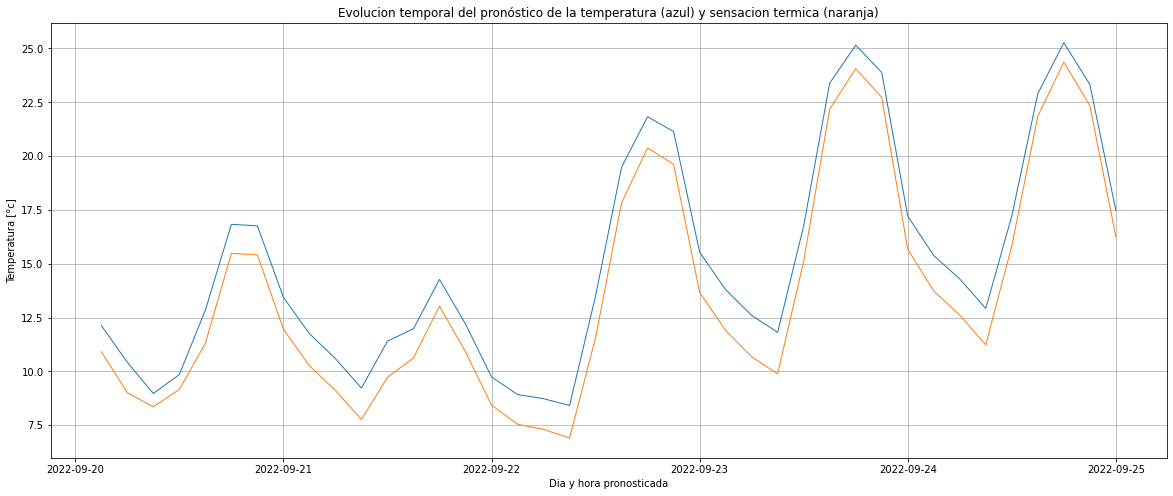

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df2 = df.rename(columns={'main.temp':'temperatura'})
df3 = df.rename(columns={'main.feels_like':'sensacion_termica'})
df4 = df.rename(columns={'main.temp_min':'temp_minima'})
df5 = df.rename(columns={'main.temp_max':'temp_maxima'})


Temperatura = pd.DataFrame()
Temperatura['Hora_del_dia'] = df.dt_txt
#Temperatura ['Hora']=[datetime.strptime(date, '%y-%m-%d %H:%M:%S').date() for date in Temperatura['Hora_del_dia']]
Temperatura['Hora_del_dia2'] = df.Fecha_Hora
#Temperatura ['Hora']=[datetime.strptime(date, '%y-%m-%d %H:%M:%S').date() for date in Temperatura['Hora_del_dia2']]
Temperatura['Temperatura'] = df2.temperatura
Temperatura['Sensacion_termica'] = df3.sensacion_termica
Temperatura['Minima'] = df4.temp_minima
Temperatura['Maxima'] = df5.temp_maxima
Temperatura.head()


fig,ax1= plt.subplots(figsize=(20,8))
ax1.plot(Temperatura.Hora_del_dia2, Temperatura.Temperatura,linewidth=1,)
ax1.plot(Temperatura.Hora_del_dia2, Temperatura.Sensacion_termica,linewidth=1,)
#Cambiar formato de la hora
#hora_UTC.strftime('%d-%m-%Y %H:%M:%S')

ax1.grid()
ax1.set_title('Evolucion temporal del pronóstico de la temperatura (azul) y sensacion termica (naranja)')
ax1.set_xlabel('Dia y hora pronosticada') #Cambiar formato de la hora
ax1.set_ylabel('Temperatura [°c]')

**8.3. Conclusiones**

Con los datos obtenidos podemos pronosticar la temperatura, condicion climatica, humedad, y demas valores de la condicion climatica. Con esos valores podemos predecir la cantidad de usuarios que van a alquilar bicicletas en los proximos 5 dias.